In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from dataset import dataset


In [3]:
# how many rows to print
pd.set_option('display.max_rows', 10)

In [16]:
fesb_symm = 'mmm'
eiger_w50 = dataset('0350.hkl', symmetry=fesb_symm)
pilatus_w50 = dataset('0373.hkl', symmetry=fesb_symm)

New dataset: 0350.hkl
Setting symmetry to mmm for 0350.hkl
No. of symops: 8
Length of data loaded: 916
Length of reduced data: 230
New dataset: 0373.hkl
Setting symmetry to mmm for 0373.hkl
No. of symops: 8
Length of data loaded: 715
Length of reduced data: 193


In [17]:
# merge the datasets based on the hkl-tuples
data = eiger_w50.data.merge(pilatus_w50.data, how='inner', on=['hkl'], suffixes=('_eig','_pil'), indicator=True)

In [18]:
print(data)

           intensity_eig  sigma_eig  intensity_pil  sigma_pil _merge
hkl                                                                 
(0, 0, 1)       0.068403   0.071498       0.216240   0.090110   both
(0, 0, 2)    8623.195000   8.487750    9688.660000  14.283475   both
(0, 1, 1)    1480.103333   2.610467    1770.553333   4.435857   both
(0, 1, 2)       0.552875   0.099160       3.625120   0.302270   both
(0, 1, 3)     354.169333   2.087940     414.803500   3.512053   both
...                  ...        ...            ...        ...    ...
(7, 4, 0)     216.220500   1.264545     282.175500   2.620495   both
(7, 4, 1)     402.219000   1.777792     575.405000   3.561945   both
(7, 5, 0)      50.145950   0.610700      65.050900   1.273370   both
(7, 5, 1)    1061.535750   3.311165    1749.780000   5.990095   both
(7, 6, 0)    1022.489500   2.401920    1385.275000   4.762015   both

[179 rows x 5 columns]


In [19]:
# calculate the scalar between them as the sum(intensity1*intensity2)/sum(intensity1)
# and scale intensity1 to intensity2
scale = np.nansum(data['intensity_eig']*data['intensity_pil'])/np.nansum(np.square(data['intensity_eig']))
data['intensity_eig'] *= scale

[Text(0.5, 0, '$I_{EIGER}$'), Text(0, 0.5, '$I_{PILATUS}$')]

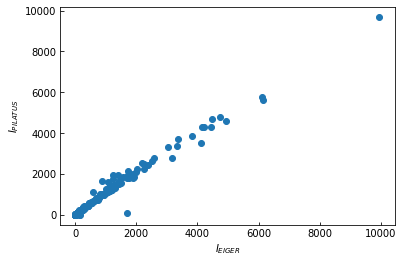

In [20]:
fig, ax = plt.subplots()

ax.scatter(data['intensity_eig'], data['intensity_pil'])
ax.tick_params(direction='in')

ax.set(xlabel='$I_{EIGER}$',
       ylabel='$I_{PILATUS}$',
      )

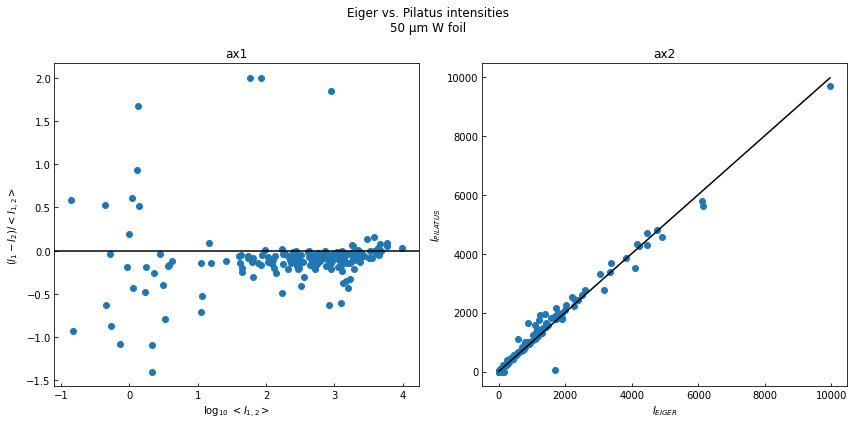

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

data_mean = (data['intensity_eig'] + data['intensity_pil'])/2
x = np.log10(data_mean)

y = (data['intensity_eig']-data['intensity_pil'])/data_mean
ax1.axhline(y=0, c='k')
ax1.scatter(x, y)

ax1.tick_params(direction='in')

ax1.set(xlabel=r'log$_{10}$ $<I_{1,2}>$',
        ylabel='($I_1 - I_2$)/$<I_{1,2}>$',
        title='ax1'
       
      )

# plot a straight line to the maximal value
ax2.plot([0, data['intensity_eig'].max()], [0, data['intensity_eig'].max()], c='k') 

ax2.scatter(data['intensity_eig'], data['intensity_pil'])
ax2.tick_params(direction='in')

ax2.set(xlabel='$I_{EIGER}$',
        ylabel='$I_{PILATUS}$',
        title='ax2'
       )



fig.suptitle('Eiger vs. Pilatus intensities\n50 µm W foil')
fig.tight_layout()